Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 100
import numpy as np
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score


fig = plt.figure()
fig.patch.set_facecolor('xkcd:ivory')

<Figure size 600x400 with 0 Axes>

# Dataset Test

Insert Dataset

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
dt = pd.read_csv('/content/drive/My Drive/Dataset/test.csv')
dt.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [14]:
dt.dropna()
dt.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000


In [8]:
dt.shape

(498121, 9)

Deteksi Missing Value

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
dtype: int64

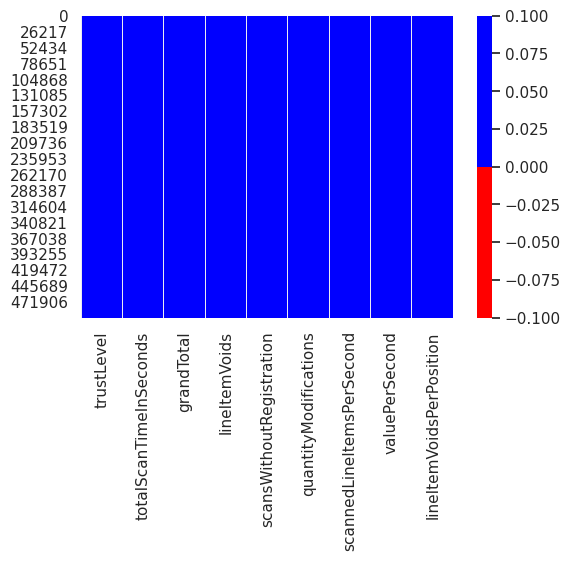

In [11]:
colours = ['red', 'blue']
sns.heatmap(dt.isnull(), cmap=sns.color_palette(colours))
dt.isna().sum()

In [12]:
dt.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
dtype: object

Cek Duplikat Data

In [42]:
cekdupl = dt.drop_duplicates (keep = False, inplace = True)
print(cekdupl)

None


Cek Outlier

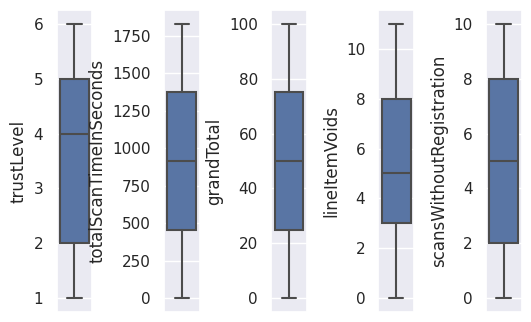

In [13]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y = dt["trustLevel"], ax = axes[0])
sns.boxplot(y = dt["totalScanTimeInSeconds"], ax = axes[1])
sns.boxplot(y = dt["grandTotal"], ax = axes[2])
sns.boxplot(y = dt["lineItemVoids"], ax = axes[3])
sns.boxplot(y = dt["scansWithoutRegistration"], ax = axes[4])
plt.subplots_adjust(wspace=2)

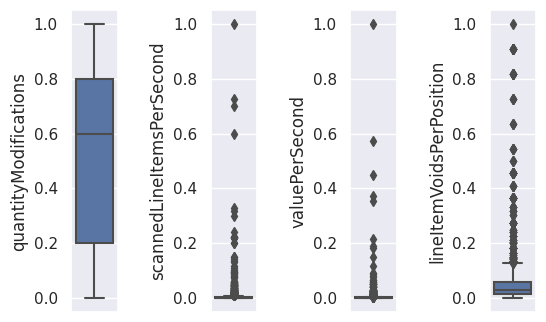

In [43]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y = dt["quantityModifications"], ax = axes[0])
sns.boxplot(y = dt["scannedLineItemsPerSecond"], ax = axes[1])
sns.boxplot(y = dt["valuePerSecond"], ax = axes[2])
sns.boxplot(y = dt["lineItemVoidsPerPosition"], ax = axes[3])
#sns.boxplot(y = dt["fraud"], ax = axes[4])
plt.subplots_adjust(wspace=2)

Scaling menggunakan MinMax Scaler

In [26]:
scale = MinMaxScaler()
x = dt [['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].values.tolist()
scale.fit(x)
y = scale.transform(x)
col_scaled = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

dt = pd.DataFrame(y, columns=col_scaled)
dt

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.8,0.575178,0.547174,0.636364,0.0,0.6,0.004045,0.001370,0.021944
1,0.4,0.057955,0.273637,0.454545,0.2,0.8,0.019364,0.006689,0.032468
2,0.4,0.827775,0.621811,0.272727,1.0,1.0,0.001204,0.001083,0.020979
3,1.0,0.978130,0.923462,0.727273,0.4,0.8,0.002347,0.001361,0.025078
4,0.8,0.234008,0.815608,0.272727,0.7,0.4,0.009337,0.005007,0.010101
...,...,...,...,...,...,...,...,...,...
1874,0.0,0.174412,0.760580,0.727273,0.7,0.4,0.010666,0.006254,0.031621
1875,0.0,0.215965,0.419010,0.454545,0.5,0.0,0.009742,0.002786,0.017483
1876,0.6,0.171679,0.418409,0.454545,0.8,0.2,0.014159,0.003495,0.015152
1877,0.2,0.373428,0.627014,0.090909,0.6,0.4,0.005174,0.002416,0.003788


Cek Korelasi

In [38]:
dt.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000


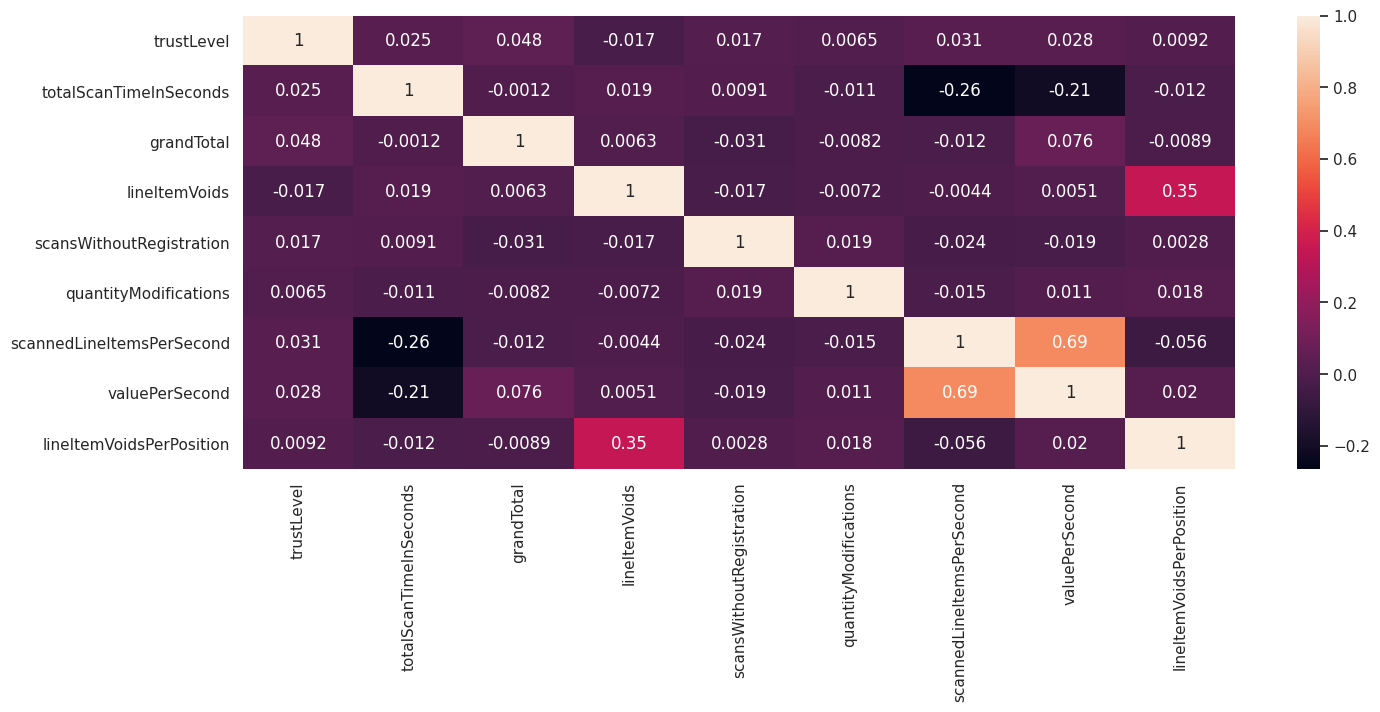

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(dt.corr(), annot=True)

# Dataset Train

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dt2 = pd.read_csv('/content/drive/My Drive/Dataset/train.csv')
dt2.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [16]:
dt2.dropna()
dt2.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [18]:
dt2.shape

(1879, 10)

Deteksi Missing Value

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

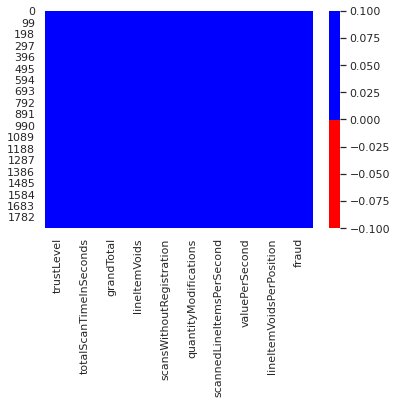

In [19]:
colours = ['red', 'blue']
sns.heatmap(dt2.isnull(), cmap=sns.color_palette(colours))
dt2.isna().sum()

In [20]:
dt2.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object

Cek Duplikat Data

In [21]:
cekdupl = dt2.drop_duplicates (keep = False, inplace = True)
print(cekdupl)

None


Cek Outlier

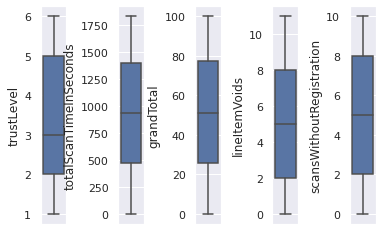

In [22]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y = dt2["trustLevel"], ax = axes[0])
sns.boxplot(y = dt2["totalScanTimeInSeconds"], ax = axes[1])
sns.boxplot(y = dt2["grandTotal"], ax = axes[2])
sns.boxplot(y = dt2["lineItemVoids"], ax = axes[3])
sns.boxplot(y = dt2["scansWithoutRegistration"], ax = axes[4])
plt.subplots_adjust(wspace=2)

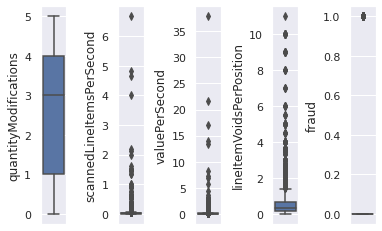

In [23]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y = dt2["quantityModifications"], ax = axes[0])
sns.boxplot(y = dt2["scannedLineItemsPerSecond"], ax = axes[1])
sns.boxplot(y = dt2["valuePerSecond"], ax = axes[2])
sns.boxplot(y = dt2["lineItemVoidsPerPosition"], ax = axes[3])
sns.boxplot(y = dt2["fraud"], ax = axes[4])
plt.subplots_adjust(wspace=2)

Scaling Menggunakan MinMaxScaler

In [24]:
scale = MinMaxScaler()
x = dt2 [['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud']].values.tolist()
scale.fit(x)
y = scale.transform(x)
col_scaled = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud']

dt2 = pd.DataFrame(y, columns=col_scaled)
dt2

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,0.8,0.575178,0.547174,0.636364,0.0,0.6,0.004045,0.001370,0.021944,0.0
1,0.4,0.057955,0.273637,0.454545,0.2,0.8,0.019364,0.006689,0.032468,0.0
2,0.4,0.827775,0.621811,0.272727,1.0,1.0,0.001204,0.001083,0.020979,0.0
3,1.0,0.978130,0.923462,0.727273,0.4,0.8,0.002347,0.001361,0.025078,0.0
4,0.8,0.234008,0.815608,0.272727,0.7,0.4,0.009337,0.005007,0.010101,0.0
...,...,...,...,...,...,...,...,...,...,...
1874,0.0,0.174412,0.760580,0.727273,0.7,0.4,0.010666,0.006254,0.031621,0.0
1875,0.0,0.215965,0.419010,0.454545,0.5,0.0,0.009742,0.002786,0.017483,1.0
1876,0.6,0.171679,0.418409,0.454545,0.8,0.2,0.014159,0.003495,0.015152,0.0
1877,0.2,0.373428,0.627014,0.090909,0.6,0.4,0.005174,0.002416,0.003788,0.0


Cek Korelasi

In [25]:
dt2.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000


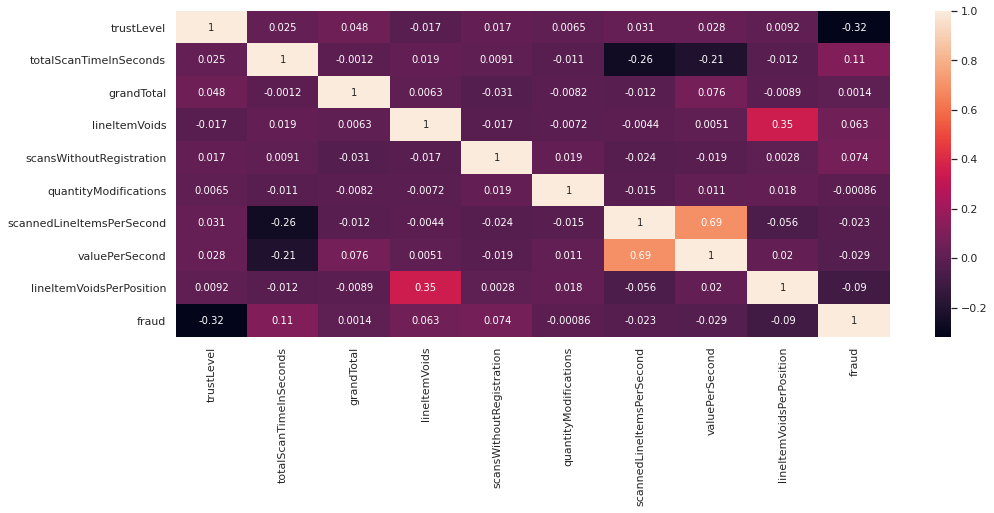

In [26]:
plt.figure(figsize=(16,6))
sns.heatmap(dt2.corr(), annot=True)

# Klasifikasi

Upload Data Class Test

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
dc = pd.read_csv('/content/drive/My Drive/Dataset/DMC-2019-realclass.csv')
fiturTr = dt2[['scannedLineItemsPerSecond', 'valuePerSecond']]
kelasTr = dt2['fraud']
fiturTs = dt[['scannedLineItemsPerSecond', 'valuePerSecond']]
kelasTs = dc['fraud']

 **Naive Bayes**

In [28]:
model = GaussianNB()
model.fit(fiturTr, kelasTr)
predikNb = model.predict(fiturTs)
print('Akurasi: ', metrics.accuracy_score(kelasTs, predikNb))
predikNb = pd.DataFrame(predikNb)
predikNb

Akurasi:  0.9312135003342561


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
498116,0.0
498117,0.0
498118,0.0
498119,0.0


Print Hasil Prediksi

**Naive Bayes**

In [30]:
predikNb.to_csv('hasilprediksi.csv')